### aim: 

### date: 

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

### atmospheric co2 files

In [40]:
co2_ssp1 = '/gpfs/data/greenocean/software/resources/SOZONE_atmo/atmco2_ssp1-26.dat'
co2_ssp3 = '/gpfs/data/greenocean/software/resources/SOZONE_atmo/atmco2_ssp3-70.dat'
co2_GCB = '/gpfs/home/mep22dku/scratch/GCB2023_atmco2/gcbco2_2023_4200_v2_padding.dat'


In [38]:
co2_ssp1_d = pd.read_csv(co2_ssp1, sep='\t')
co2_ssp3_d = pd.read_csv(co2_ssp3, sep='\t')
co2_GCB_d = pd.read_csv(co2_GCB, sep='\t')



Text(0, 0.5, 'ppm')

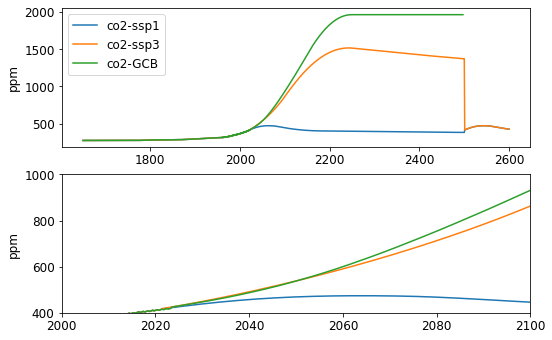

In [28]:
fact = 0.7
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(co2_ssp1_d['1650.042'],co2_ssp1_d['276.58'], label = 'co2-ssp1')
axs[0].plot(co2_ssp3_d['1650.042'],co2_ssp3_d['276.58'], label = 'co2-ssp3')
axs[0].plot(co2_GCB_d['1650.042'],co2_GCB_d['276.58'], label = 'co2-GCB')
axs[0].legend(loc = 'best')
axs[0].set_ylabel('ppm')
ind = 1
axs[ind].plot(co2_ssp1_d['1650.042'],co2_ssp1_d['276.58'], label = 'co2-ssp1')
axs[ind].plot(co2_ssp3_d['1650.042'],co2_ssp3_d['276.58'], label = 'co2-ssp3')
axs[ind].plot(co2_GCB_d['1650.042'],co2_GCB_d['276.58'], label = 'co2-GCB')
axs[ind].set_xlim([2000,2100])
axs[ind].set_ylim([400,1000])
axs[ind].set_ylabel('ppm')

In [ ]:
fact = 0.7
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(co2_ssp1_d['1650.042'],co2_ssp1_d['276.58'], label = 'co2-ssp1')
axs[0].plot(co2_ssp3_d['1650.042'],co2_ssp3_d['276.58'], label = 'co2-ssp3')
axs[0].plot(co2_GCB_d['1650.042'],co2_GCB_d['276.58'], label = 'co2-GCB')
axs[0].legend(loc = 'best')
axs[0].set_ylabel('ppm')
ind = 1
axs[ind].plot(co2_ssp1_d['1650.042'][0:300],co2_ssp1_d['276.58'], label = 'co2-ssp1')
axs[ind].plot(co2_ssp3_d['1650.042'],co2_ssp3_d['276.58'], label = 'co2-ssp3')
axs[ind].plot(co2_GCB_d['1650.042'],co2_GCB_d['276.58'], label = 'co2-GCB')
axs[ind].set_xlim([2000,2100])
axs[ind].set_ylim([400,1000])
axs[ind].set_ylabel('ppm')

### c14 files

- i made copies of the c14 files `/gpfs/data/greenocean/software/resources/SOZONE_atmo/atmb14_TJ_hm.dat` and `/gpfs/data/greenocean/software/resources/SOZONE_atmo/atmc14_TJ_hm.dat` and put them in `/gpfs/home/mep22dku/scratch/c14_dat` because the .dat format is basically unreadable by pandas (i reformatted to csv), to look at values



In [58]:
atmb14 = '/gpfs/home/mep22dku/scratch/c14_dat/atmb14_TJ_hm.csv'
atmc14 = '/gpfs/home/mep22dku/scratch/c14_dat/atmc14_TJ_hm.csv'
atmb14_d = pd.read_csv(atmb14, sep=',')
atmc14_d = pd.read_csv(atmc14, sep=',')

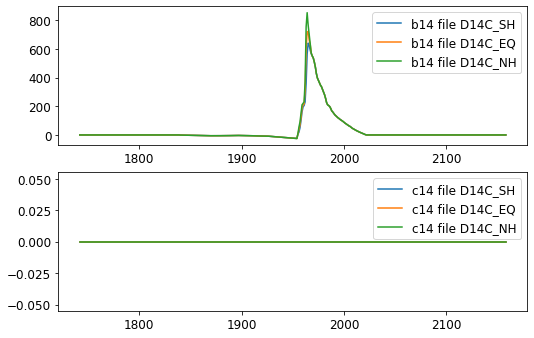

In [61]:
fact = 0.7
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(atmb14_d.YEAR,atmb14_d.D14C_SH, label = 'b14 file D14C_SH')
axs[0].plot(atmb14_d.YEAR,atmb14_d.D14C_EQ, label = 'b14 file D14C_EQ')
axs[0].plot(atmb14_d.YEAR,atmb14_d.D14C_NH, label = 'b14 file D14C_NH')

axs[1].plot(atmc14_d.YEAR,atmc14_d.D14C_SH, label = 'c14 file D14C_SH')
axs[1].plot(atmc14_d.YEAR,atmc14_d.D14C_EQ, label = 'c14 file D14C_EQ')
axs[1].plot(atmc14_d.YEAR,atmc14_d.D14C_NH, label = 'c14 file D14C_NH')

axs[0].legend()
axs[1].legend()

In [57]:
atmc14_d

,from,supplementary,material,in,Graven,et,al,GBC,2012,and,Graven.1,PNAS,2015
0,YEAR,D14C_SH,D14C_EQ,D14C_NH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1742,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1743,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1744,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1745,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2154,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,2155,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,2156,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,2157,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/home/mep22dku/scratch/ModelRuns'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

tdiad = xr.open_mfdataset(make_yearlist(2074, 2082, 'diad', 'TOM12_TJ_1AA6'))

In [77]:
tqt4 = tdiad.qtrC14b.groupby('time_counter.year').mean(dim = ['x','y'])

In [75]:
tqt4.values()

TypeError: 'numpy.ndarray' object is not callable

In [79]:
tqt4.values

array([4.0551822e-07, 4.3367456e-07, 4.9577130e-07, 4.8887273e-07,
       4.1949374e-07, 4.4171523e-07, 3.9743512e-07, 4.0545123e-07,
       4.1663537e-07, 3.8522117e-07, 4.0879394e-07, 3.8742360e-07,
       3.8330265e-07, 4.3471218e-07, 4.5566546e-07, 4.7821919e-07,
       4.1082990e-07, 4.0979887e-07, 4.3058387e-07, 4.0357847e-07,
       3.8711892e-07, 3.9616816e-07, 4.0703941e-07, 3.7993183e-07,
       3.9937868e-07, 4.3368300e-07, 4.7260693e-07, 4.6730602e-07,
       4.6386060e-07, 4.2284046e-07, 4.4089694e-07, 4.4401784e-07,
       4.0162635e-07, 4.0863586e-07, 4.0098789e-07, 3.9669854e-07,
       3.9054757e-07, 4.1933319e-07, 4.7864631e-07, 4.5645922e-07,
       4.3822743e-07, 3.9617228e-07, 3.8451600e-07, 3.9722639e-07,
       3.7422686e-07, 3.7669807e-07, 3.7270445e-07, 3.7875932e-07,
       4.1039857e-07, 4.4566997e-07, 4.9611174e-07, 4.5285111e-07,
       4.1771133e-07, 4.1627300e-07, 4.0869637e-07, 4.0972694e-07,
       4.1499987e-07, 4.0412920e-07, 4.0024526e-07, 3.8576911e

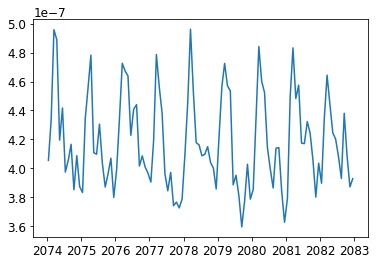

In [86]:
plt.figure()
#plt.plot(tqt4['time_counter'].to_datetimeindex(), tqt4.values )

plt.plot(tqt4.indexes['time_counter'].to_datetimeindex(), tqt4.values)

In [68]:
tdiad

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 31, time_counter: 108, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 4.999938 15.000288 ... 5250.2266
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 2074-01-16 12:00:00 ... 2082-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    DOCTRP                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    EXP                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMIC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMES                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMAC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PPTDOC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PPT                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    TChl                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Detrit                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Carniv                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Herbiv                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMICPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMESPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMACPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    nitrfix               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    denitr                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    DELO2                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    vsink                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    sinksil               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    probsi                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    losbsi                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    remdsi                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    discarb               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ExpCO3                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ExpARA                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAGEL     